# RERITE – One-Click Reproducibility

**This is a simple demonstration of an organised workflow project folder in Python using Anaconda.**  
The goal is clarity and reproducibility: a clean environment, a clear run order, and all outputs in `results/`.  
The dataset is the base-R `mtcars` table with columns and values exactly as documented in R.

## Step 0A — Environment and Launch

Use `environment.yml` to create and use the conda environment.

**Option A — Anaconda Navigator**  
Open Anaconda Navigator → Environments → Import → select `environment.yml` → give it the name `RERITE_demo` → Import.  
(Do **not** launch Jupyter from Navigator.)

**Option B — Command Line**  
Create the environment using: `conda env create -f environment.yml`.

## Step 0B — How to Run This Project Every Time

To run this project correctly, always open **Anaconda Prompt**, then use the command  
`conda activate RERITE_demo`  
to switch into the correct environment.

Next, follw these steps

1. move into the project folder using  
`cd path\to\RERITE_demo`.

2.  start Jupyter with  
`jupyter lab`  
or, if preferred,  
`jupyter notebook`.

Launching Jupyter in any other way will not load the correct environment.


In [1]:
# Step 2 — Load data
from scripts import load_mtcars
df = load_mtcars()  # reads data/mtcars.csv; attaches model names if available
print(df.shape)
df.head()


(32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Step 2 — Data Summary
Compute per-cylinder summary statistics for fuel efficiency (mpg), engine power (hp), and vehicle weight (wt).
The aggregated results are exported to results/summary_by_cyl.csv for use in later steps.

In [2]:
from scripts import summarize_by_cyl
summary = summarize_by_cyl()
summary


,mpg_mean,mpg_median,mpg_std,hp_mean,hp_median,hp_std,wt_mean,wt_median,wt_std
cyl,,,,,,,,,
4,26.66,26.0,4.51,82.64,91.0,20.93,2.29,2.20,0.57
6,19.74,19.7,1.45,122.29,110.0,24.26,3.12,3.22,0.36
8,15.10,15.2,2.56,209.21,192.5,50.98,4.00,3.76,0.76


## Step 3 — Visualisation
Create a scatter of horsepower vs mpg, colored by cylinder count and sized by weight. Saves to `results/mtcars_mpg_vs_hp.png`.


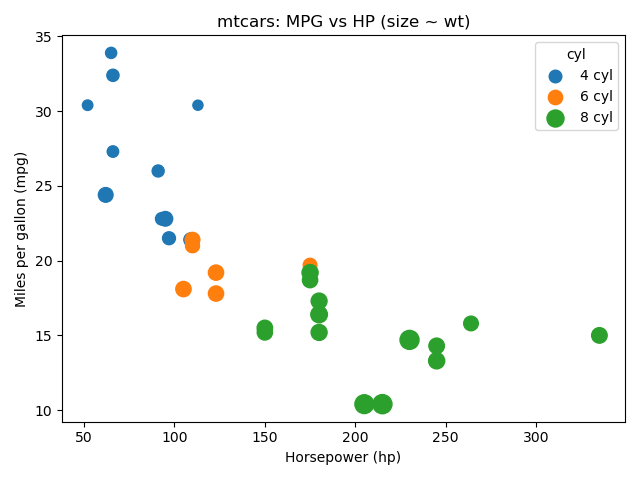

'results/mtcars_mpg_vs_hp.png'

In [3]:
from scripts import plot_mpg_vs_hp
from IPython.display import Image, display

png_path = plot_mpg_vs_hp()
display(Image(filename=png_path))
png_path


## Step 4 (Optional) - Generate the figures and tables automatically in a LaTex Document

In [5]:
# Run this once after you overwrite codes/generate_article.py
import sys, pathlib, importlib
sys.path.insert(0, str(pathlib.Path.cwd() / "scripts"))
import scripts.generate_article as ga
importlib.reload(ga)  # important to avoid stale definitions

_ = ga.build_elsevier_manuscript(
    results_dir="results",
    docs_dir="reports",
    out_path="reports/manuscript.tex",
    title="REproducible Research In Transportation Engineering (RERITE): A Hands-On Tutorial 2.0 – Reproducible Manuscripts (RERITE at ITSC 2025)",
    authors=["Dr Saeed Mohammadian"],
    affiliation="School of Civil Engineering, The University of Queensland",
    abstract_text="This manuscript was auto-assembled from pipeline outputs.",
)

print("Manuscript generated at /reports/manuscript.tex")

PDF generated: C:\Users\uqsmoha8\Dropbox\Material Development\Draft Materials by Saeed\RERITE_demo\reports\manuscript.pdf
Manuscript generated at /reports/manuscript.tex
